# Projeto Atraso nas entregas

Esse projeto tem como principal objetivo realizar análise exploratória, aplicar engenharia de atributos e pré-processamento de dados para verificar o comportamento dos atrasos nas entregas aos clientes realizadas por uma empresa X (variável alvo = entregue_no_prazo).

In [40]:
#Importando bibiliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from scipy import stats
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset.csv')

data.info() #-> Não há valores nulos

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [3]:
#Separando as variáveis em variáveis numéricas e categóricas

cat = ['corredor_armazem','modo_envio','prioridade_produto','genero']
num = ['numero_chamadas_cliente','avaliacao_cliente','custo_produto','compras_anteriores','desconto','peso_gramas']
target = ['entregue_no_prazo']

## Variáveis numéricas

In [4]:
data[num].describe() 

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


- Não há valores ausentes (todos os counts iguais)
- numero_chamadas_cliente, custo_produto e avaliacao_cliente tem média e mediana próximas (talvez sigam uma distribuição normal)

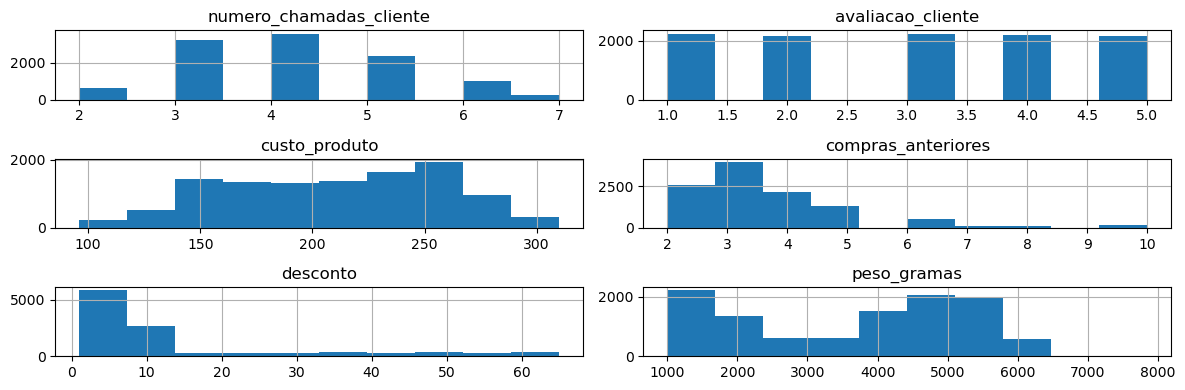

In [5]:
#Histograma inicial
fig,ax = plt.subplots(nrows=1,ncols=6,figsize=(12,4))

def hist_plot(var_num,i):
    data[num].hist(ax=ax[i])
    
for i,var_num in enumerate(num):
    hist_plot(var_num,i)

plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plt.show()

## Variáveis Categóricas

In [6]:
data[cat].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


- Corredor F é de onde vem a maioria dos pedidos
- Maioria dos pedidos é enviada de navio
- Maioria dos pedidos é de baixa prioridade
- Maioria dos pedidos são feitos por mulheres

In [7]:
for var_cat in cat:
    print(data[var_cat].value_counts())
    print("\n")

F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64


Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64


baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64


F    5546
M    5454
Name: genero, dtype: int64




- A diferença de pedidos feitos por homens e mulheres é pouco relevante

## Análise Univariada

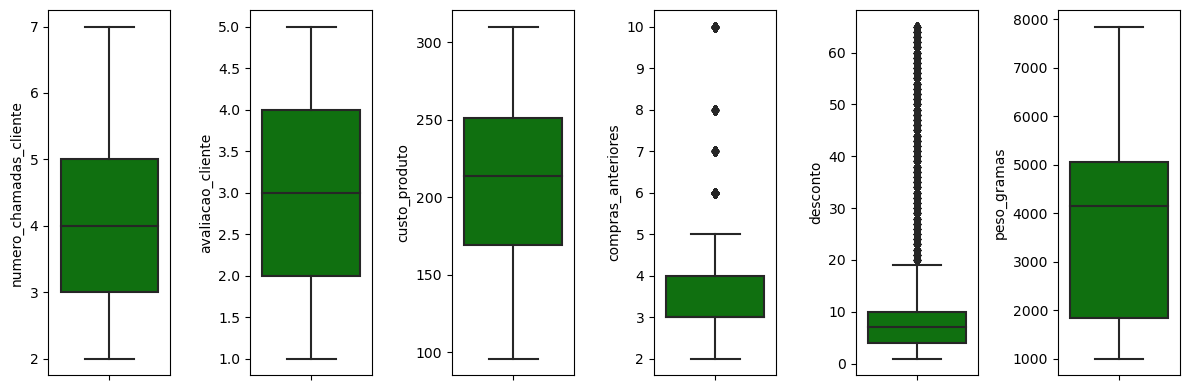

In [8]:
#Boxplots para ver outliers das variáveis numéricas
fig,ax = plt.subplots(nrows=1,ncols=6,figsize=(12,4))

def box_plot(var_num,i):
    sns.boxplot(data=data[num],y=var_num,ax=ax[i],color='green')
    
for i,var_num in enumerate(num):
    box_plot(var_num,i)

plt.tight_layout()
plt.show()

Identificamos a presença de outliers em compras_anteriores e desconto. Importante frisar que os outliers aqui são calculados considerando o IQR e quantis

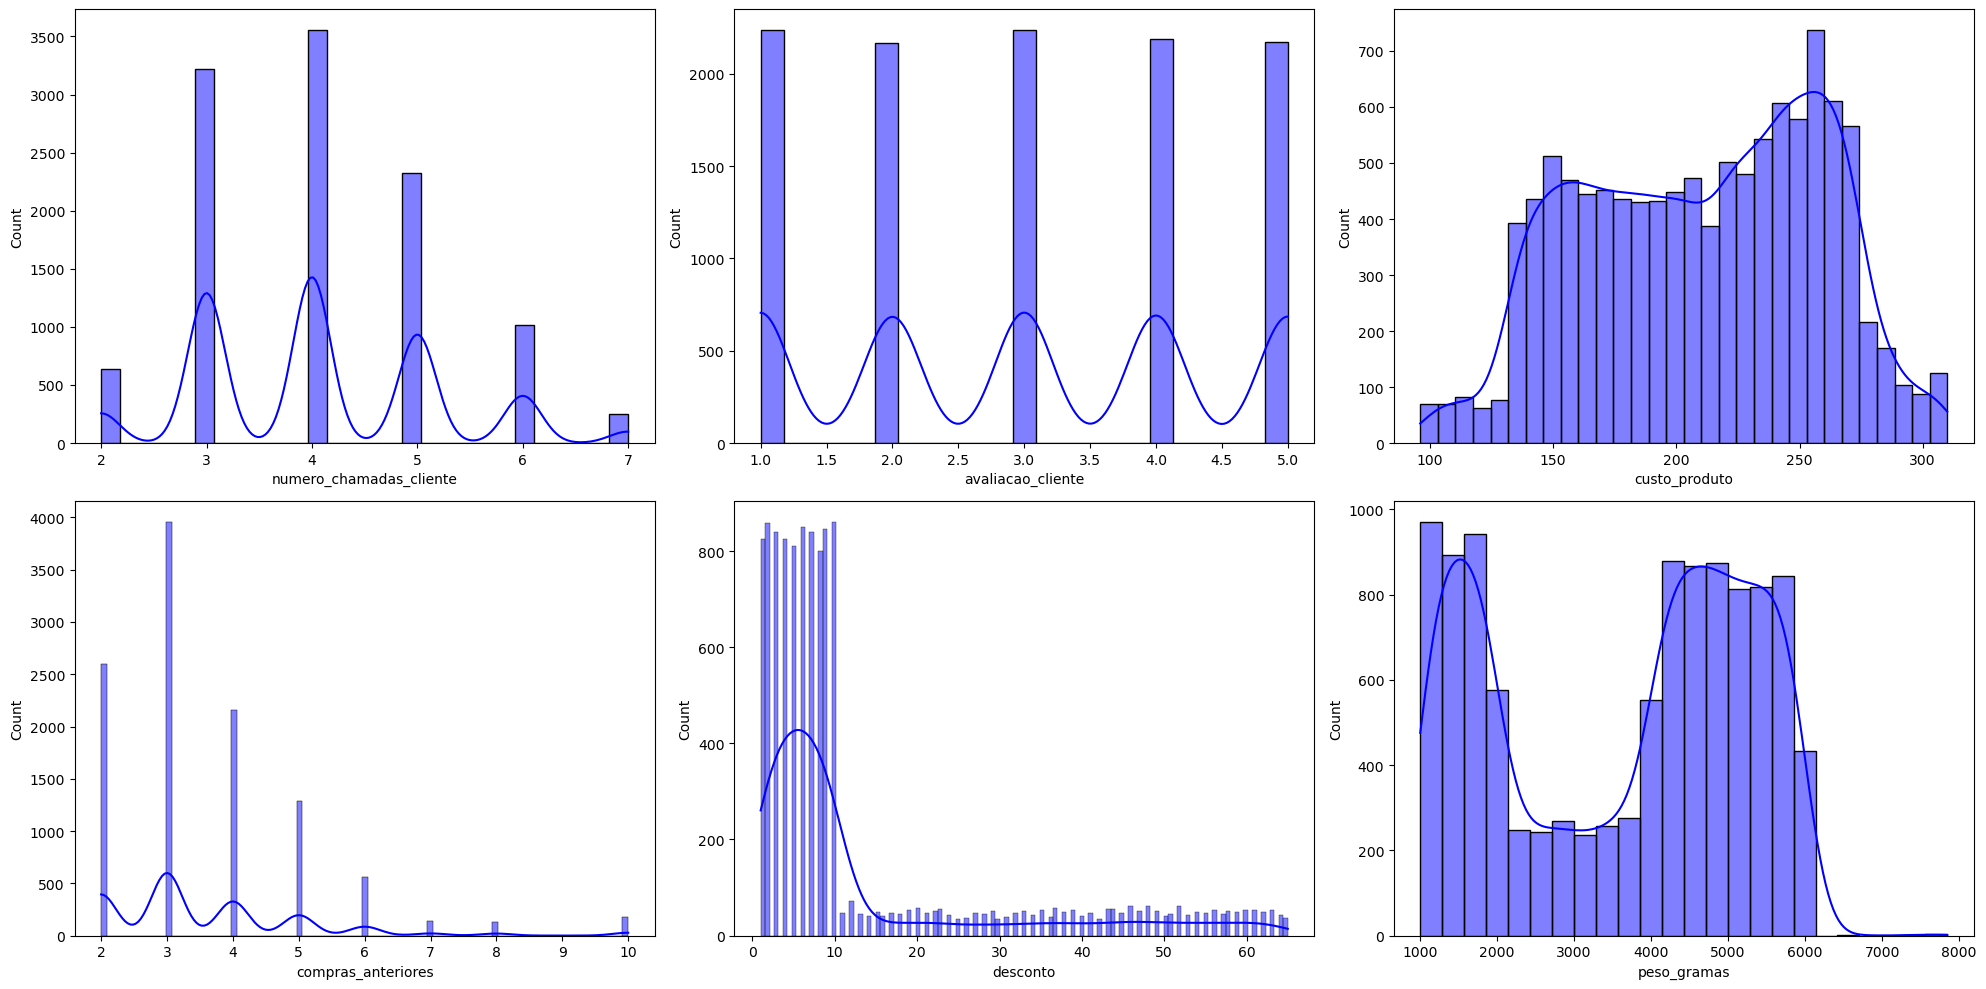

In [9]:
#Histograma para ver a distribuição das variáveis numéricas
plt.figure(figsize=(20,10))

for i,var_cat in enumerate(num):
    plt.subplot(2,3,i+1)
    sns.histplot(data=data[num],x=var_cat,kde=True,color='blue')

plt.tight_layout()
plt.show()

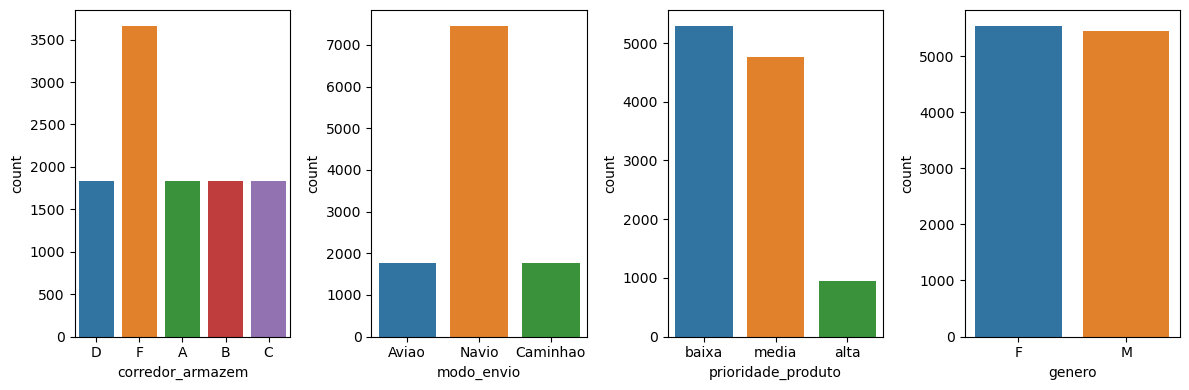

In [10]:
#Countplot para as variáveis categóricas
plt.figure(figsize=(12,4))

for i,var_cat in enumerate(cat):
    plt.subplot(1,4,i+1)
    sns.countplot(data=data[cat],x=var_cat)

plt.tight_layout()
plt.show()

## Análise Bivariada

In [11]:
data[num].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<AxesSubplot:>

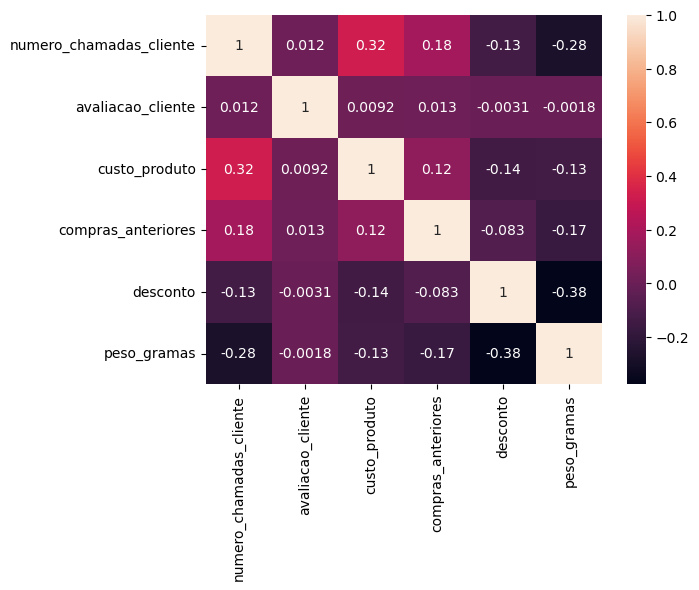

In [12]:
sns.heatmap(data[num].corr(),annot=True)

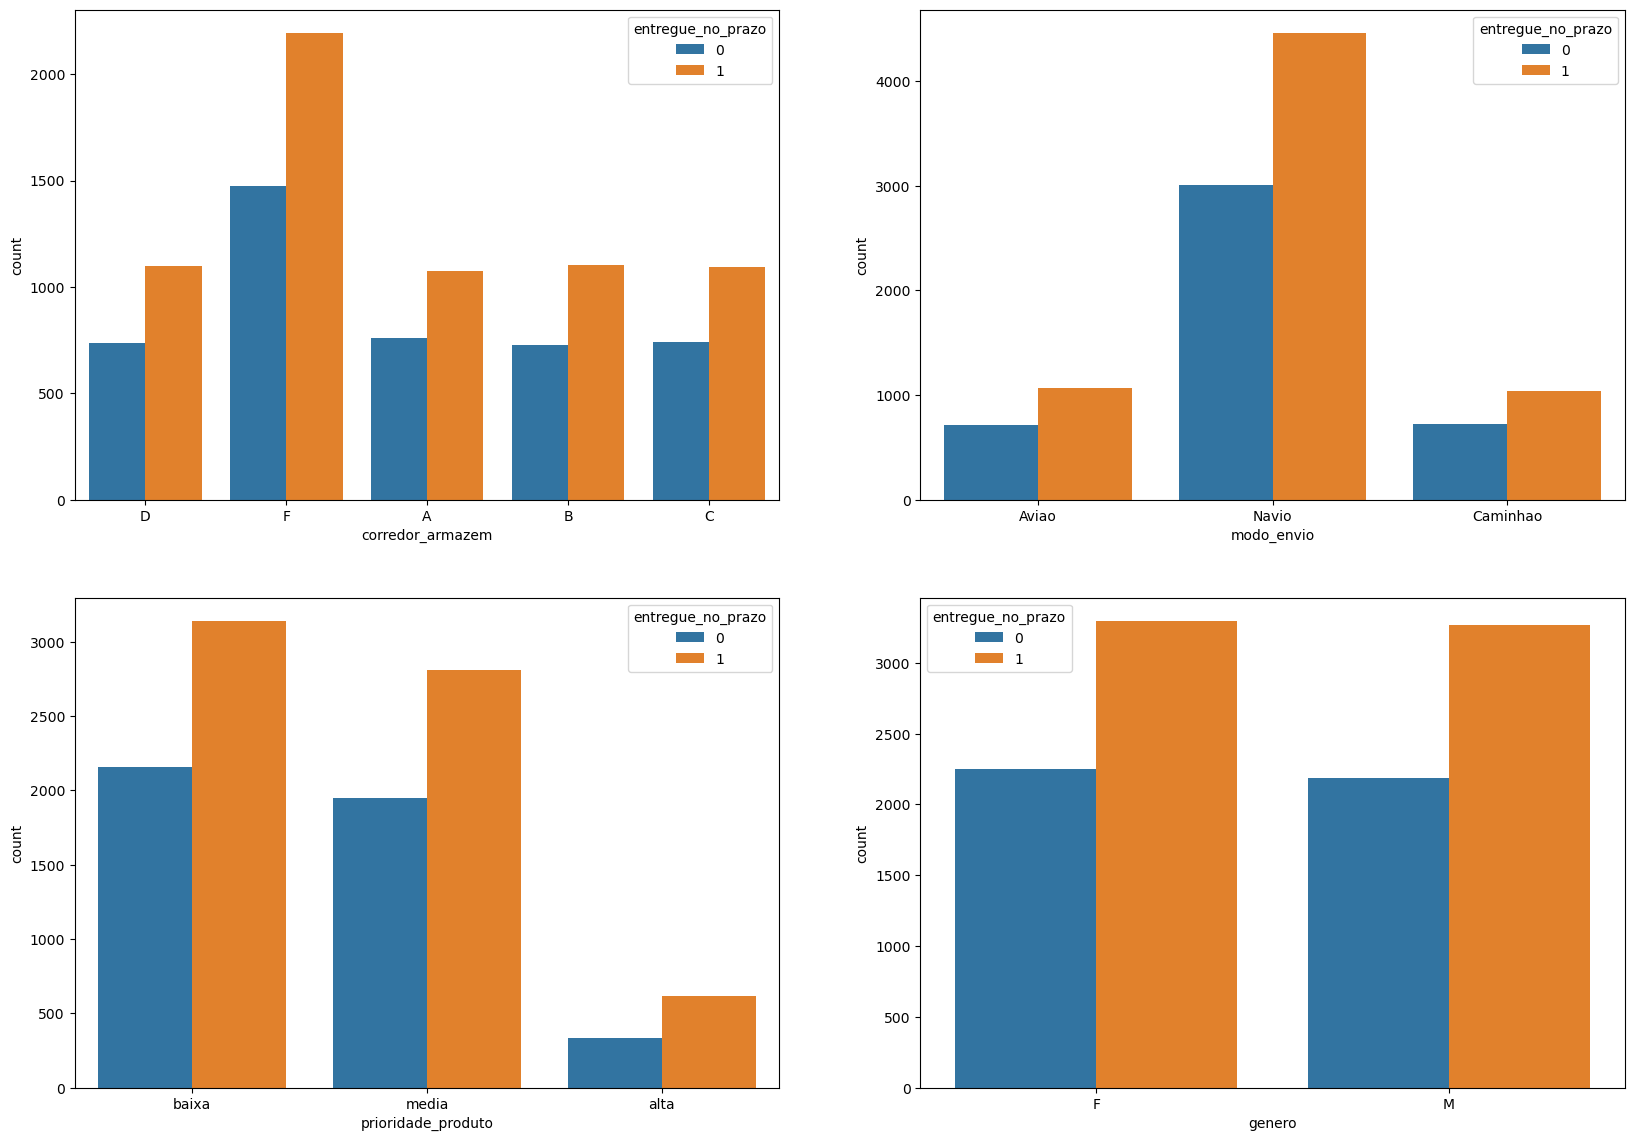

In [13]:
plt.figure(figsize=(20,14))

for i,var_cat in enumerate(cat):
    plt.subplot(2,2,i+1)
    sns.countplot(data=data,x=var_cat,hue='entregue_no_prazo')

Os gráficos acima podem nos levar a crer que:
- O corredor F atrasa mais entregas
- O modo de entrega por "Navio" causa mais atrasos
- Entregas de baixa prioridade atrasam mais

### PERGUNTAS DE NEGÓCIO
- O atraso nas entregas está igualmente distribuído pelos modos de envio? Há diferenças discrepantes?
- Há diferenças significativas quando o produto tem prioridade baixa ou média?
- Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [14]:
data.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


<AxesSubplot:xlabel='modo_envio', ylabel='%Porcentagem'>

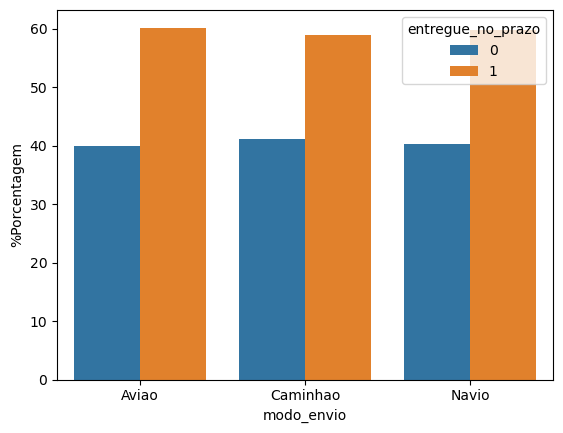

In [15]:
df_modo1 = data.groupby(['modo_envio','entregue_no_prazo']).agg({'ID':'nunique'}).reset_index()
df_modo2 = data.groupby(['modo_envio']).agg({'ID':'nunique'}).reset_index()

df_modo3=df_modo1.merge(df_modo2,on='modo_envio')
df_modo3['%Porcentagem']=100*(df_modo3['ID_x']/df_modo3['ID_y'])

sns.barplot(data=df_modo3,x='modo_envio',y='%Porcentagem',hue='entregue_no_prazo')#

Diferentemente do que os gráficos anteriores poderiam sugerir, a análise **proporcional** de atrasos por modo de envio sugere que na verdade não há grandes diferenças/influência do modo de envio na entrega ser ou não entregue no prazo

<AxesSubplot:xlabel='prioridade_produto', ylabel='%Porcentagem'>

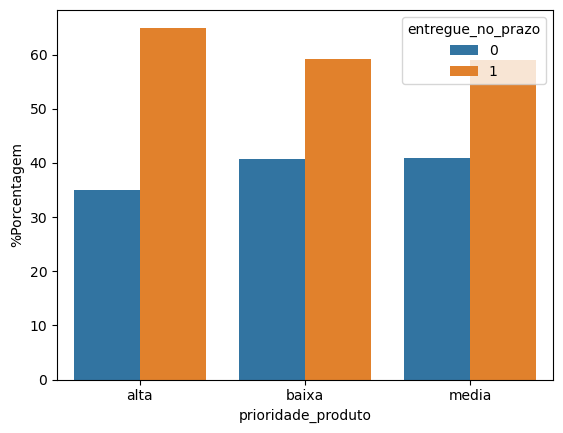

In [16]:
df_prioridade1 = data.groupby(['prioridade_produto','entregue_no_prazo']).agg({'ID':'nunique'}).reset_index()
df_prioridade2 = data.groupby(['prioridade_produto']).agg({'ID':'nunique'}).reset_index()

df_prioridade3=df_prioridade1.merge(df_prioridade2,on='prioridade_produto')
df_prioridade3['%Porcentagem']=100*(df_prioridade3['ID_x']/df_prioridade3['ID_y'])

sns.barplot(data=df_prioridade3,x='prioridade_produto',y='%Porcentagem',hue='entregue_no_prazo')#

Conclusão semelhante feita através desse gráfico, a prioridade do produto não aparenta afetar de forma discrepante a variável target, apesar de que itens de alta prioridade aparentemente tem uma tendência levemente menor a atrasarem. Já entre produtos de baixa e média prioridade, não há grandes diferenças e ambos apresentam aproximadamente a mesma relação com a variável target. 

<AxesSubplot:xlabel='corredor_armazem', ylabel='%Porcentagem'>

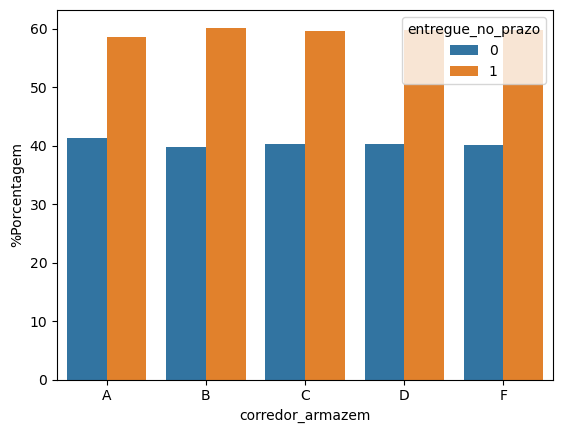

In [17]:
df_corredor1 = data.groupby(['corredor_armazem','entregue_no_prazo']).agg({'ID':'nunique'}).reset_index()
df_corredor2 = data.groupby(['corredor_armazem']).agg({'ID':'nunique'}).reset_index()

df_corredor3=df_corredor1.merge(df_corredor2,on='corredor_armazem')
df_corredor3['%Porcentagem']=100*(df_corredor3['ID_x']/df_corredor3['ID_y'])

sns.barplot(data=df_corredor3,x='corredor_armazem',y='%Porcentagem',hue='entregue_no_prazo')#

Conclusão semelhante para a relação corredor_armazem e a variável target

# ENGENHARIA DE ATRIBUTOS

In [18]:
#Tratamento de valores ausentes
data.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

In [19]:
#Tratamento de valores duplicados:
data = data.drop_duplicates()

In [20]:
#Tratamento de outliers: z-scores

registros = np.array([True]*len(data)) #Array de Trues do tamanho do dataframe

for col in num:
    zscore = abs(stats.zscore(data[col]))
    registros = (zscore<3)&registros #Converta pra false quem tiver módulo de zscore maior que 3

data=data[registros]

<AxesSubplot:>

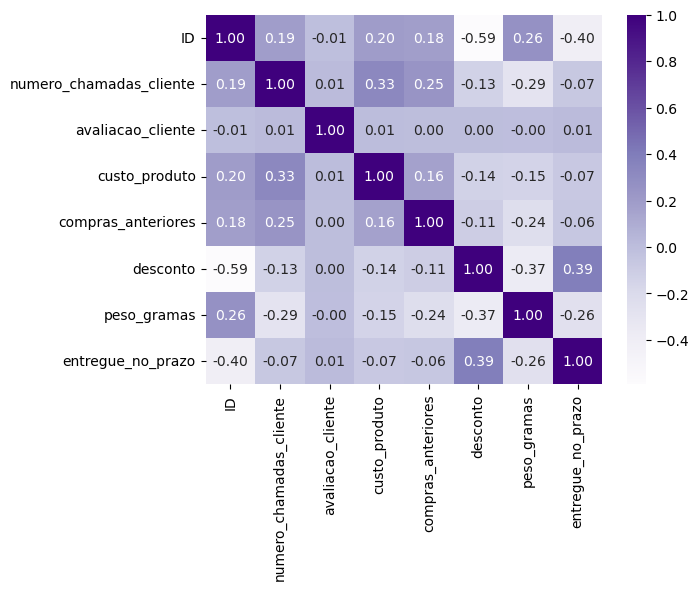

In [21]:
#Feature selection
plt.figure()
sns.heatmap(data=data.corr(),annot=True,cmap='Purples',fmt='.2f')

Para variáveis numéricas:
- Iremos trabalhar apenas com aquelas que possuem um grau de correlação maior que +/-0,05 com a target (numero_chamas_clientes,custo_produto, compras_anteriores, desconto e peso_gramas)

Para variáveis categóricas:
- Vimos nos gráficos anteriores que não há muita diferença entre pedidos feitos pelos gêneros, então iremos descartar essa variável

In [22]:
#Feature extraction
df_eng = data[['corredor_armazem','modo_envio','numero_chamadas_cliente','custo_produto','compras_anteriores','desconto','peso_gramas','entregue_no_prazo','prioridade_produto']]
df_eng.dtypes

corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
custo_produto               int64
compras_anteriores          int64
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
prioridade_produto         object
dtype: object

### 1- Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?
Regras estabelecidas:
- Alta prioridade, atrasou = Atraso Crítico
- Média prioridade, atrasou = Atraso Problemático
- Baixa prioridade, atrasou = Atraso Tolerável
- Não atrasou = Não apresenta problema

In [23]:
df_eng['Classe_Atraso'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0),
    "Atraso Critico",
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0),
        "Atraso Problemático",
        np.where(
            (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0),
            "Atraso Toleravel",
            "Sem Atraso"
        )
    )
)

df_eng.head()

,corredor_armazem,modo_envio,numero_chamadas_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo,prioridade_produto,Classe_Atraso
0,D,Aviao,4,177,3,44,1233,1,baixa,Sem Atraso
1,F,Aviao,4,216,2,59,3088,1,baixa,Sem Atraso
2,A,Aviao,2,183,4,48,3374,1,baixa,Sem Atraso
3,B,Aviao,3,176,4,10,1177,1,media,Sem Atraso
4,C,Aviao,2,184,3,46,2484,1,media,Sem Atraso


<AxesSubplot:xlabel='Classe_Atraso'>

<Figure size 2000x1000 with 0 Axes>

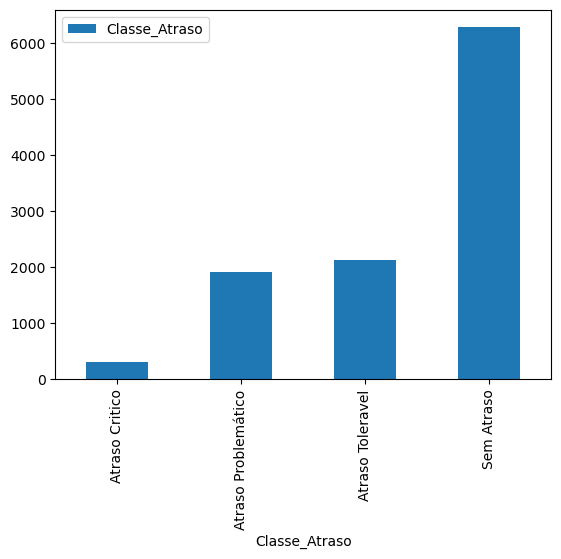

In [24]:
plt.figure(figsize=(20,10))
df_eng.groupby('Classe_Atraso').agg({'Classe_Atraso':'count'}).plot(kind='bar')#

Aparentemente existem muito mais "atrasos problemáticos" e "atrasos toleráveis", que são aqueles associados às categorias de média e baixa prioridade, respectivamente

### 2- Performance de Envio dos Produtos Considerando os Descontos

Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

**Desconto**
- Desconto acima ou maior que a média
- Deconto abaixo da média

**Performances**
- Desconto acima ou maior que a média + atraso: Alto Desconto com atraso
- Desconto acima ou maior que a média sem atraso: Alto desconto sem atraso
- Desconto abaixo da média + atraso: Baixo desconto com atraso
- Desconto abaixo da média sem atraso: Baixo desconto sem atraso

In [25]:
mean = np.mean(df_eng['desconto'])

df_eng['Classe_desconto']=np.where(
    (df_eng['desconto']>=mean) & (df_eng['entregue_no_prazo']==0),"Alto desconto com atraso",
                        np.where((df_eng['desconto']>=mean) & (df_eng['entregue_no_prazo']==1),"Alto desconto sem atraso",
                        np.where((df_eng['desconto']<mean) & (df_eng['entregue_no_prazo']==0),"Baixo desconto com atraso",
                        "Baixo desconto sem atraso"
                                
                                )
        )
)

<AxesSubplot:xlabel='Classe_desconto'>

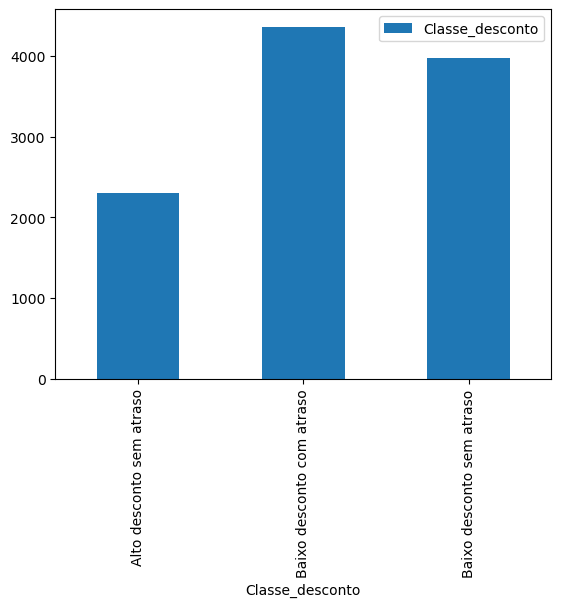

In [26]:
df_eng.groupby('Classe_desconto').agg({'Classe_desconto':'count'}).plot(kind='bar')

In [79]:
df = df_eng

# PRÉ-PROCESSAMENTO DE DADOS

In [80]:
#Variáveis categóricas - label encoding (cat ordinárias) e one-hot encoding (cat nominais)

categ_label = ['prioridade_produto','Classe_desconto','Classe_Atraso']
categ_onehot = ['corredor_armazem','modo_envio']

for cat_ord in categ_label:
    le = LabelEncoder().fit(df[cat_ord])
    df[cat_ord]=le.transform(df[cat_ord])

for cat_nom in categ_onehot:
    dummies = pd.get_dummies(df[cat_nom], prefix=cat_nom)
    df = df.join(dummies)
    
df = df.drop(columns=categ_onehot)

df

,numero_chamadas_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo,prioridade_produto,Classe_Atraso,Classe_desconto,corredor_armazem_A,corredor_armazem_B,corredor_armazem_C,corredor_armazem_D,corredor_armazem_F,modo_envio_Aviao,modo_envio_Caminhao,modo_envio_Navio
0,4,177,3,44,1233,1,1,3,0,0,0,0,1,0,1,0,0
1,4,216,2,59,3088,1,1,3,0,0,0,0,0,1,1,0,0
2,2,183,4,48,3374,1,1,3,0,1,0,0,0,0,1,0,0
3,3,176,4,10,1177,1,2,3,2,0,1,0,0,0,1,0,0
4,2,184,3,46,2484,1,2,3,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,4,232,5,6,1247,0,2,1,1,0,1,0,0,0,0,0,1
10996,5,242,5,4,1155,0,1,2,1,0,0,1,0,0,0,0,1
10997,5,223,6,2,1210,0,2,1,1,0,0,0,0,1,0,0,1
10998,2,155,5,6,1639,0,1,2,1,0,0,0,1,0,0,0,1


In [95]:
#Variáveis numéricas: Feature Scaling -> normalização e padronização

num_normal = ['custo_produto','peso_gramas']
num_padron = ['numero_chamadas_cliente','compras_anteriores','desconto']

normal = MinMaxScaler()
padroniza = StandardScaler()

for var in num_normal:
    df[var]=normal.fit_transform(df[var].values.reshape(-1,1))
for var in num_padron:
    df[var]=padroniza.fit_transform(df[var].values.reshape(-1,1))

df

,numero_chamadas_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo,prioridade_produto,Classe_Atraso,Classe_desconto,corredor_armazem_A,corredor_armazem_B,corredor_armazem_C,corredor_armazem_D,corredor_armazem_F,modo_envio_Aviao,modo_envio_Caminhao,modo_envio_Navio
0,-0.057348,0.378505,-0.359702,2.099353,0.033893,1,1,3,0,0,0,0,1,0,1,0,0
1,-0.057348,0.560748,-1.135605,3.099936,0.304894,1,1,3,0,0,0,0,0,1,1,0,0
2,-1.803706,0.406542,0.416201,2.366175,0.346676,1,1,3,0,1,0,0,0,0,1,0,0
3,-0.930527,0.373832,0.416201,-0.168635,0.025712,1,2,3,2,0,1,0,0,0,1,0,0
4,-1.803706,0.411215,-0.359702,2.232764,0.216654,1,2,3,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,-0.057348,0.635514,1.192105,-0.435457,0.035939,0,2,1,1,0,1,0,0,0,0,0,1
10996,0.815832,0.682243,1.192105,-0.568868,0.022498,0,1,2,1,0,0,1,0,0,0,0,1
10997,0.815832,0.593458,1.968008,-0.702279,0.030533,0,2,1,1,0,0,0,0,1,0,0,1
10998,-1.803706,0.275701,1.192105,-0.435457,0.093207,0,1,2,1,0,0,0,1,0,0,0,1
